In [1]:
import cmaps
from eofs.standard import Eof
import netCDF4 as nc
import numpy as npy
import matplotlib.pyplot as plt
from mpl_toolkits.basemap  import Basemap
from matplotlib import cm
import pandas as pd

from utils.const import ROOT, FILE_NAME, LONS, LATS
from utils.func import convert_date, plot_to_map
from utils.func import csv_to_masked_array as ctm

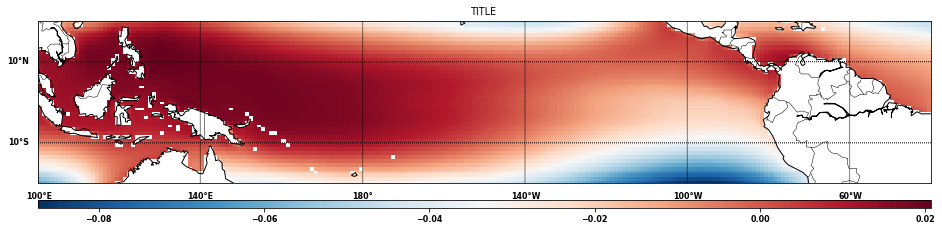

In [2]:
year_ssh = ctm("./season_average/fall/1992.csv")
for i in range(1993, 2018):
    y = ctm("./season_average/fall/{}.csv".format(i))
    year_ssh = npy.ma.append(year_ssh, y, axis=0)
year_ssh.shape

plot_to_map(LONS, LATS, year_ssh.sum(axis=0)/(2018-1992+1), set_cmaps="RdBu_r")

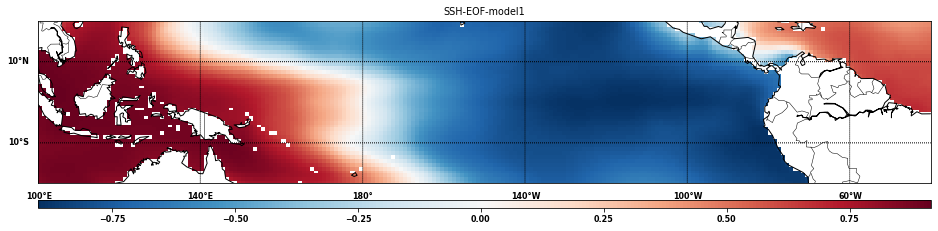

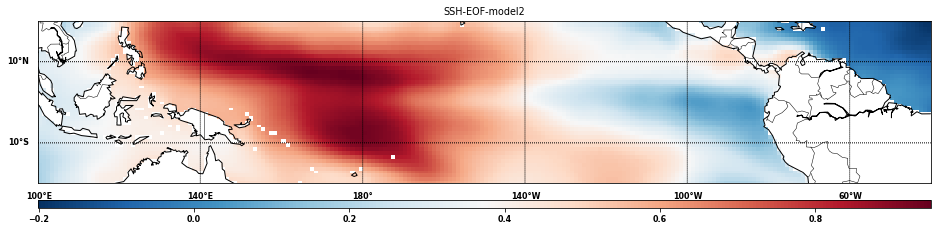

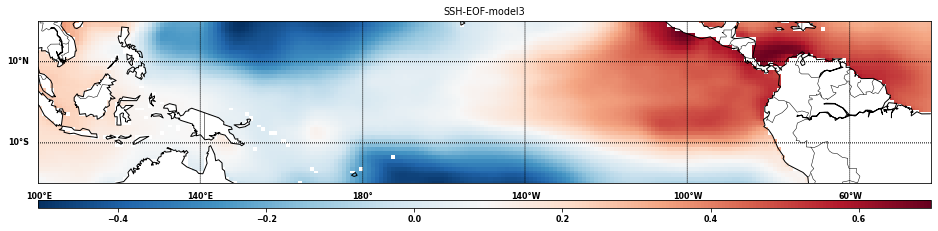

In [3]:
coslat = npy.cos(npy.deg2rad(LATS))
wgts = npy.sqrt(coslat)[..., npy.newaxis]

solver = Eof(year_ssh, weights=wgts)

eof = solver.eofsAsCorrelation(neofs=3)
pc = solver.pcs(npcs=3, pcscaling=1)
var = solver.varianceFraction()

plot_to_map(LONS, LATS, eof[0,:,:], fig_title="SSH-EOF-model1", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[1,:,:], fig_title="SSH-EOF-model2", set_cmaps="RdBu_r")
plot_to_map(LONS, LATS, eof[2,:,:], fig_title="SSH-EOF-model3", set_cmaps="RdBu_r")

In [4]:
var

array([5.41827533e-01, 2.60830906e-01, 5.91986433e-02, 3.22694948e-02,
       2.34513573e-02, 1.78853443e-02, 1.20079800e-02, 1.04137702e-02,
       8.05095930e-03, 5.42628512e-03, 4.57718545e-03, 4.12034122e-03,
       3.28862220e-03, 2.85875361e-03, 2.60617041e-03, 2.32347445e-03,
       1.67887214e-03, 1.58645771e-03, 1.25454544e-03, 1.06670939e-03,
       9.38610647e-04, 7.34366020e-04, 6.13236491e-04, 5.02729277e-04,
       4.87652746e-04, 2.60960208e-31])

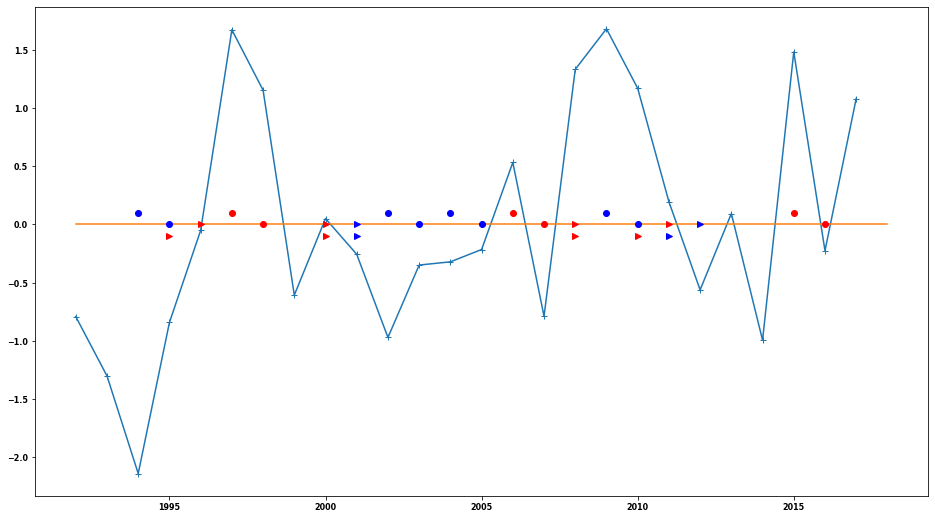

In [10]:
plt.figure(figsize=(16,9))
plt.plot(npy.arange(1992, 2018), pc[:,2], "+-")
# plt.plot(npy.arange(1992, 2018), pc[:,1])
plt.plot([1992, 2018], [0,0])
# plt.plot([1994, 1997, 2002, 2004, 2006, 2009, 2014], [0,0,0,0,0,0,0], 'o')
# plt.plot([1995, 1998, 1999, 2000, 2007, 2010, 2011], [0,0,0,0,0,0,0], ">")
plt.plot(npy.array([1994,1995,2002,2003,2004,2005,2009,2010]), [0.1,0,0.1,0,0.1,0,0.1,0], "bo")
plt.plot(npy.array([1997,1998,2006,2007,2015,2016]), [0.1,0,0.1,0,0.1,0], "ro")
plt.plot(npy.array([1995,1996,2000,2000,2008,2008,2010,2011]), -npy.array([0.1,0,0.1,0,0.1,0,0.1,0]), "r>")
plt.plot(npy.array([2001,2001,2011,2012]), -npy.array([0.1,0,0.1,0]), "b>")

In [6]:
pc[:,0]

array([-0.91168723, -0.83489113, -1.10125981,  0.59785895,  0.29934812,
       -2.2614297 ,  0.97101012,  1.18887447,  0.60005182,  0.20164131,
       -0.85772703, -0.38249668, -0.53974642,  0.4006595 , -0.7536642 ,
        0.938789  ,  0.90515479, -0.77390897,  1.83650549,  1.24564832,
        0.31551148,  0.1869551 , -0.29303274, -2.01407615,  0.54666947,
        0.48924211])